In [2]:
## Data profiling
### 1. General information about the dataset (rows, cols, language distribution)
### 2. Data enrichment setting labels (0: not Italian, 1: Italian)
### 3. Pre-processing text column
### 4. Profiling of the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### 1. General information


In [4]:
original_dataset=pd.read_csv('..\\..\\Dataset\\Language Detection.csv')

original_dataset.head(10)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [5]:
cols=list(original_dataset.columns)
numb_cols=len(cols)
numb_rows=original_dataset.shape[0]
print(cols,'(',numb_cols,')', 'rows:',numb_rows)

['Text', 'Language'] ( 2 ) rows: 10337


In [6]:
cardinality_languages=original_dataset['Language'].value_counts()

cardinality_languages


English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

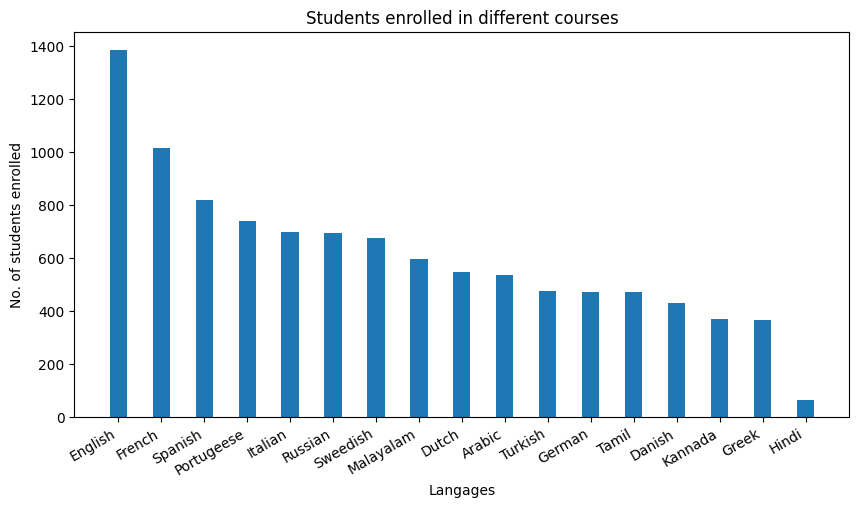

In [7]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cardinality_languages.index, cardinality_languages.values,
        width = 0.4)
 
plt.xlabel("Langages")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
avg_value=sum(cardinality_languages.values)/len(cardinality_languages.values)
plt.xticks(rotation=30, ha='right')

plt.show()

In [8]:

import numpy as np
from math import sqrt
elements=np.array(cardinality_languages.values)
avg_value=np.average(elements)
var=np.var(elements)
max_value=np.max(elements)
min_value=np.min(elements)

print('AVG value',avg_value)
print('VAR value', sqrt(var))
print('Max number of text',max_value,'English')
print('Min number of text', min_value, 'Hindi')

AVG value 608.0588235294117
VAR value 282.96403234088945
Max number of text 1385 English
Min number of text 63 Hindi


# 2. Data enrichment

In [9]:
original_dataset['Class'] = np.where(original_dataset['Language']== 'Italian', 1, 0)
original_dataset.head(10)

,Text,Language,Class
0,"Nature, in the broadest sense, is the natural...",English,0
1,"""Nature"" can refer to the phenomena of the phy...",English,0
2,"The study of nature is a large, if not the onl...",English,0
3,"Although humans are part of nature, human acti...",English,0
4,[1] The word nature is borrowed from the Old F...,English,0
5,"[2] In ancient philosophy, natura is mostly us...",English,0
6,"[3][4] \nThe concept of nature as a whole, the...",English,0
7,During the advent of modern scientific method ...,English,0
8,"[5][6] With the Industrial revolution, nature ...",English,0
9,"However, a vitalist vision of nature, closer t...",English,0


In [10]:
italian_entry=original_dataset[original_dataset.Class == 1].shape[0]
other=original_dataset.shape[0]-italian_entry
total=original_dataset.shape[0]
print('total',total)
print('Non-italian', other)
print('Italian',italian_entry)

print('Total:',total, '100%')

print('Not italian:',other,int((other/total)*100),'%')
print('Italian:',italian_entry,int((italian_entry/total)*100),'%')


total 10337
Non-italian 9639
Italian 698
Total: 10337 100%
Not italian: 9639 93 %
Italian: 698 6 %


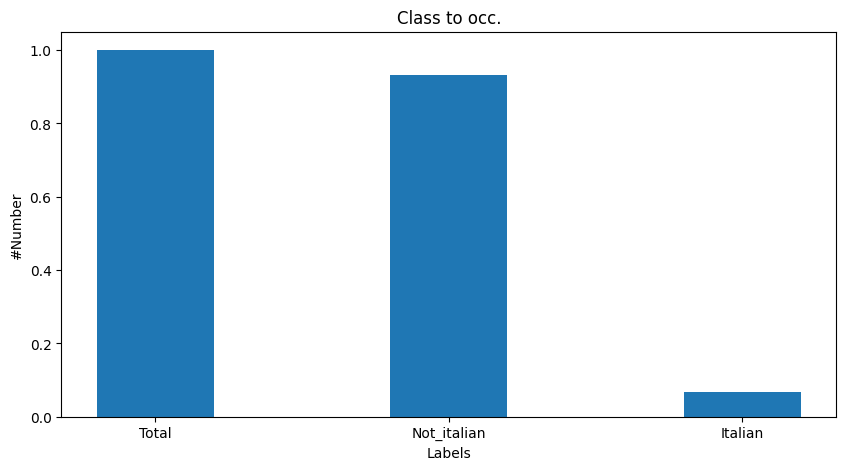

In [11]:
entyes={'Total':total/total ,'Not_italian':other/total, 'Italian': italian_entry/total}
Label = list(entyes.keys())
occ = list(entyes.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Label, occ,
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("#Number")
plt.title("Class to occ.")
plt.show()

## Unbalanced data
### The italian records are olny 6% of the dataset

## 3. Parsing data
### The first version of the parsin method removes all the extra values from the text field of the dataset such as punctuation, numbers, and wikipedia references (es.[4],[7]).
### It also transforsm in lower case each input text

In [12]:
import re
def format_values(text):
    text=re.sub(r'[!@#$()—,\n"%^*?:;0-9)]','',text)
    text=re.sub(r'[[]]','',text)
    text=text.lower()
    text=text.strip()
    return text

In [13]:
#textProcessing
import re
data_list=[]
paresed_dataset=original_dataset.copy()
paresed_dataset['Text']=paresed_dataset['Text'].apply(format_values)
paresed_dataset.head(10)


  



C:\Users\Wissel\AppData\Local\Temp\ipykernel_23716\3494415240.py:4: FutureWarning: Possible nested set at position 1
  text=re.sub(r'[[]]','',text)


,Text,Language,Class
0,nature in the broadest sense is the natural ph...,English,0
1,nature can refer to the phenomena of the physi...,English,0
2,the study of nature is a large if not the only...,English,0
3,although humans are part of nature human activ...,English,0
4,the word nature is borrowed from the old frenc...,English,0
5,in ancient philosophy natura is mostly used as...,English,0
6,the concept of nature as a whole the physical ...,English,0
7,during the advent of modern scientific method ...,English,0
8,with the industrial revolution nature increasi...,English,0
9,however a vitalist vision of nature closer to ...,English,0


In [14]:
#Saving the parsed dataset
paresed_dataset.to_csv('..\\..\\Dataset\\Lang_det_parsed.csv')

## 4. Sampling dataset
### Creating a sample dataset for viewing text data stats
### The sample has to contain all Italian elements and 0.6 of the elements not Italian


In [100]:
thresh=int(0.1*other)
thresh


963

## 5. Analyziong elements by column text
### 5.1 common words italian and not italian
### 5.2 common n-grams italian and not italian

### 5.1 Common words italian

In [15]:
import random
def get_mean_len(elements):
    sum_lenghts=0
    max=0
    min=np.infty
    N=len(elements)
    for e in elements:
        i=random.randint(0,50)
        if i ==1:
            print(e)
        words=e.split(' ')
        words_len=len(words)
        if words_len>max:
            max=words_len
        if words_len<min:
            min=words_len
        sum_lenghts+=words_len

    return sum_lenghts/N
        

        

In [16]:
def count_words(e):
    words=e.split(' ')
    if words[0]=='':
        return len(words)-1
    return len(words)

In [17]:
def count_spaces(e):
    count=0
    for i in e:
        if i==' ':
            count+=1
    return count

In [18]:
paresed_dataset['Number of words']=paresed_dataset['Text'].apply(count_words)
paresed_dataset['Number of spaces']=paresed_dataset['Text'].apply(count_spaces)
paresed_dataset.to_csv('..\\..\\Dataset\\Lang_det_parsed.csv')
paresed_dataset.head(10)

,Text,Language,Class,Number of words,Number of spaces
0,nature in the broadest sense is the natural ph...,English,0,13,12
1,nature can refer to the phenomena of the physi...,English,0,16,15
2,the study of nature is a large if not the only...,English,0,14,13
3,although humans are part of nature human activ...,English,0,19,18
4,the word nature is borrowed from the old frenc...,English,0,30,29
5,in ancient philosophy natura is mostly used as...,English,0,38,37
6,the concept of nature as a whole the physical ...,English,0,50,49
7,during the advent of modern scientific method ...,English,0,23,22
8,with the industrial revolution nature increasi...,English,0,41,40
9,however a vitalist vision of nature closer to ...,English,0,21,20


In [19]:
paresed_dataset['Good_Text']=np.where(paresed_dataset['Number of words']== paresed_dataset['Number of spaces']+1, 1, 0)
bad_data=paresed_dataset.loc[paresed_dataset['Good_Text'] == 0]
print(bad_data.shape[0])
#there is no bad text in the parsed datasource

0


In [20]:
#AVG word length of italian texet
italian_avg_words4entry=paresed_dataset[paresed_dataset['Class']==1]['Number of words'].mean()
print("AVG words in italian sentence",italian_avg_words4entry)

AVG words in italian sentence 22.078796561604584


In [21]:
not_italian=paresed_dataset[paresed_dataset['Class']==0]['Number of words'].mean()
print("AVG words in not-italian sentence",not_italian)

AVG words in not-italian sentence 19.221392260607946


### Creating a word to count of italian words to see the corpus of the dataset

In [22]:
def fun_word2count(data):
    word2count=dict()
    for i in data:
        words=i.split(' ')
        for w in words:
            if w in word2count:
                word2count[w]+=1
            else:
                word2count[w]=1
    word2count=dict(sorted(word2count.items(), key=lambda x: x[1], reverse=True))
    return word2count


    
    
        

In [23]:
def plot_word2count(word2count,sample):
    words=list(word2count.keys())
    occ=list(word2count.values())
    words_sample=words[0:sample]
    occ_sample=occ[0:sample]
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    
    fig = plt.figure(figsize = (20, 20))
    
    # creating the bar plot
    plt.barh(words_sample, occ_sample,)
    
    plt.xlabel("#occ")
    plt.ylabel("words")
    plt.title("Class to occ.")
    plt.yticks(rotation=40)
    plt.show()

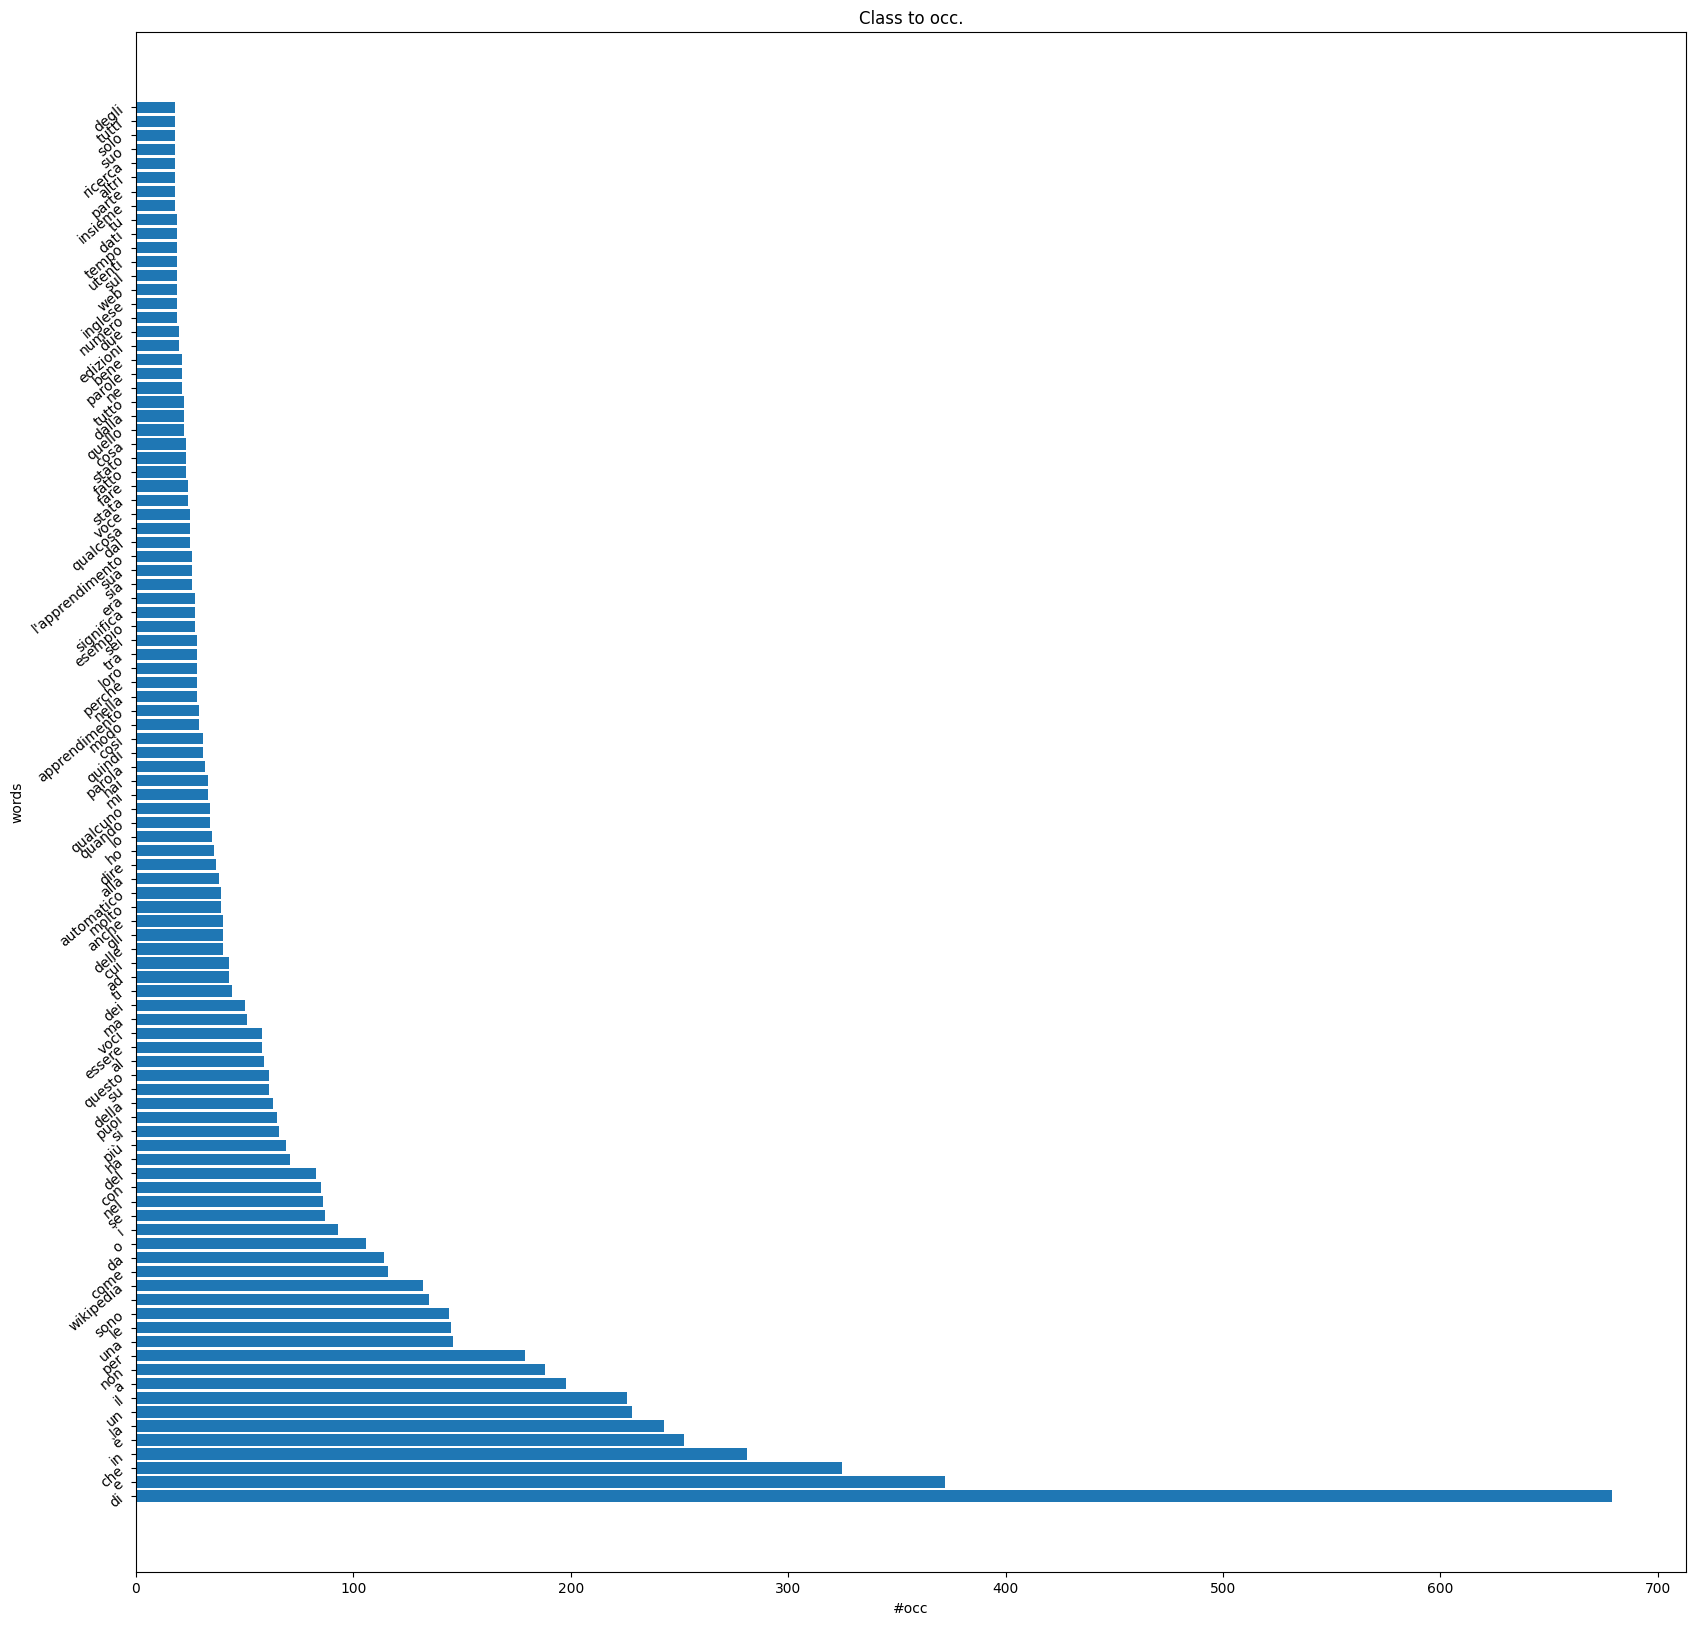

c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\py

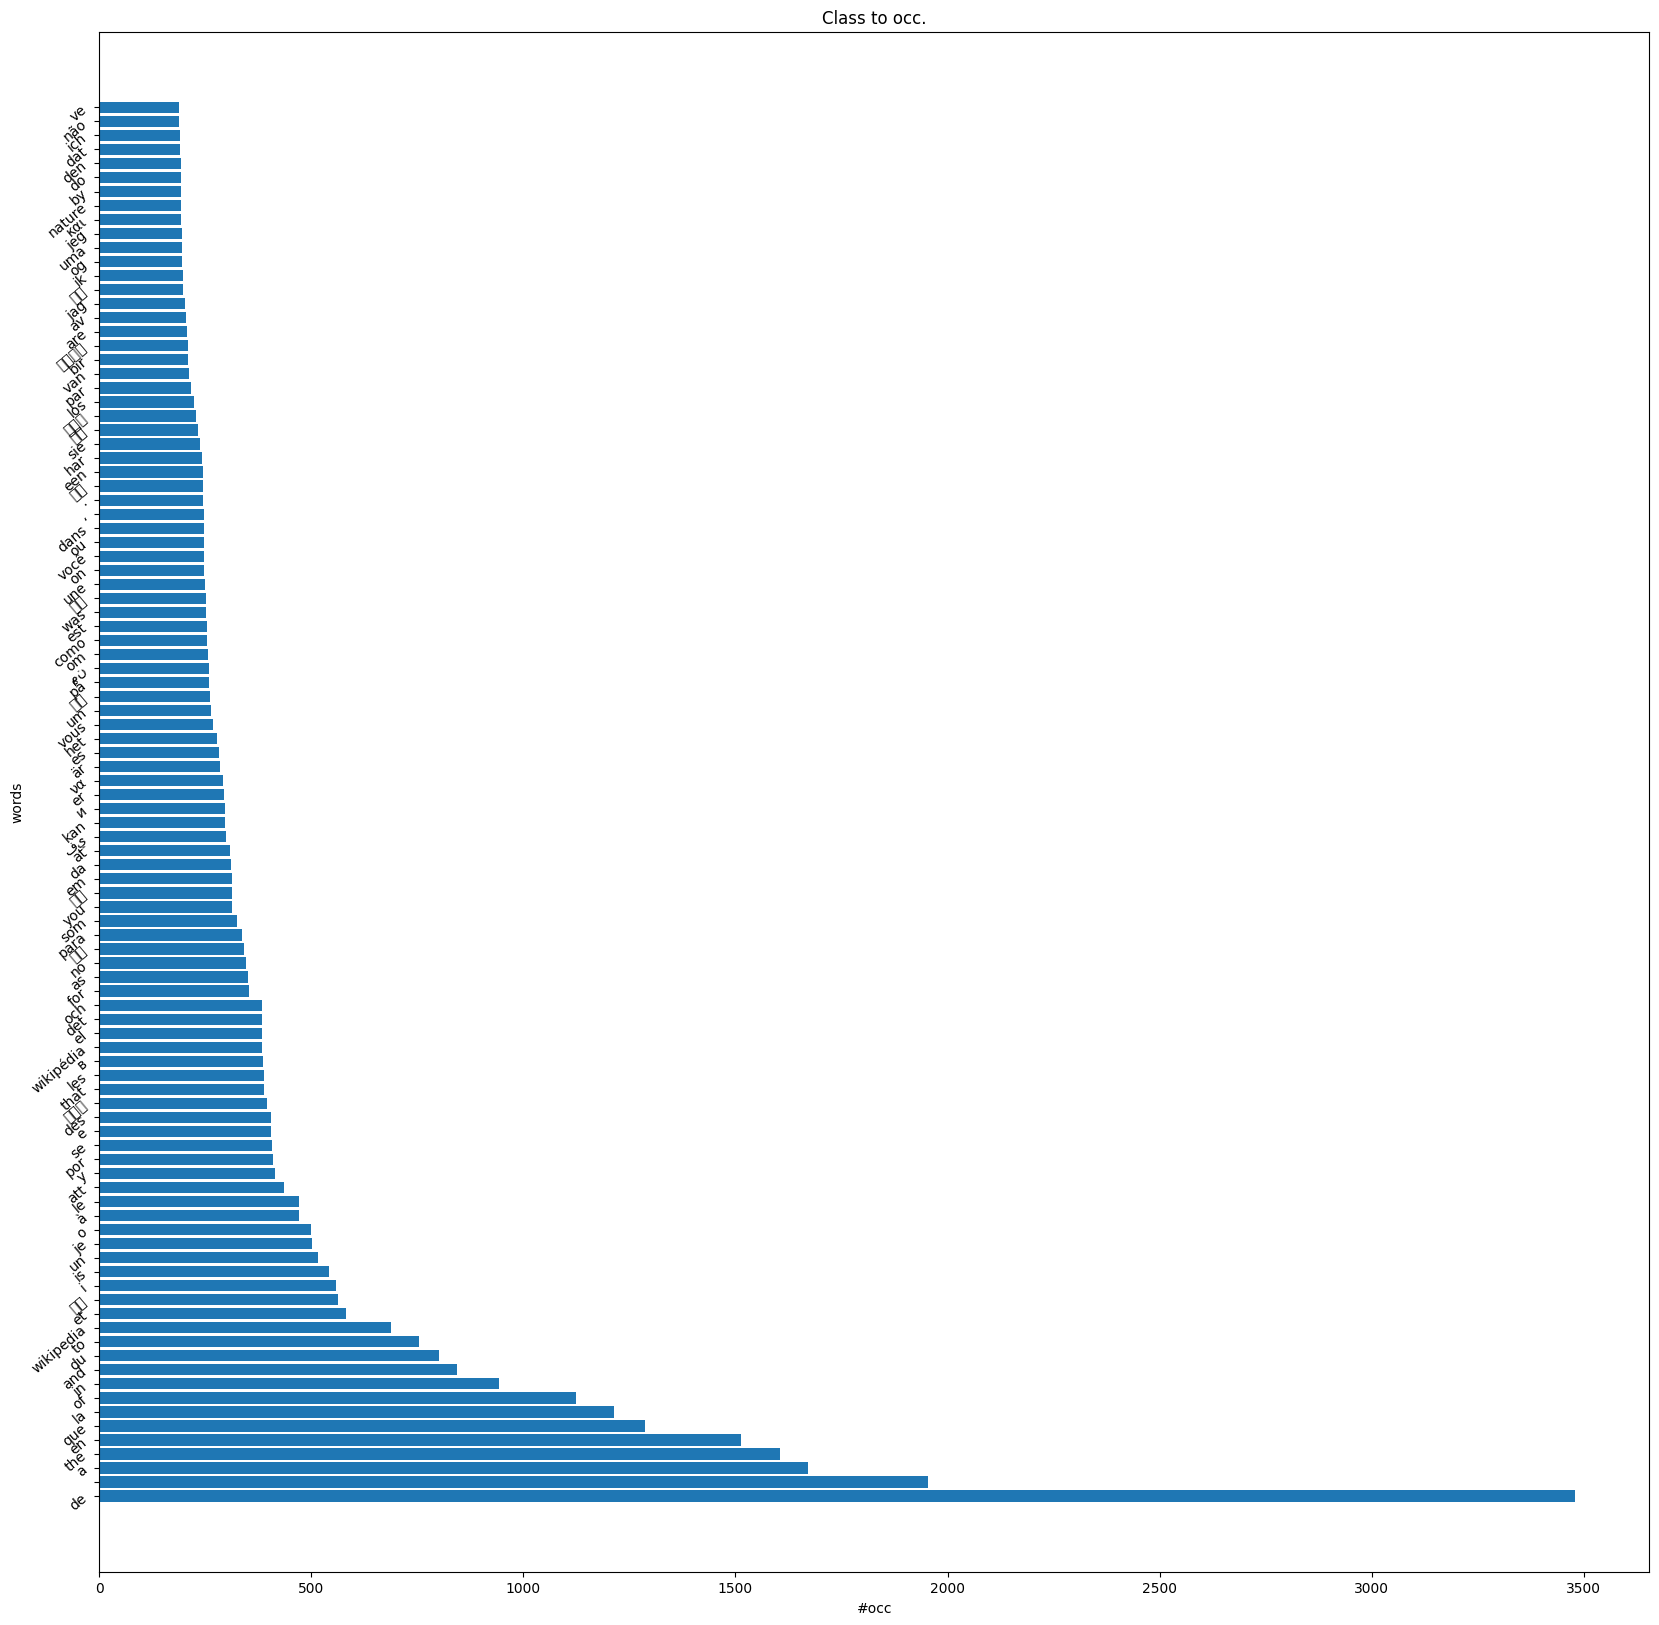

In [24]:
#inverted index creation
only_italian=paresed_dataset[paresed_dataset['Class']==1]['Text']
not_italian=paresed_dataset[paresed_dataset['Class']==0]['Text']

word2count_ita=fun_word2count(only_italian)
word2count_other=fun_word2count(not_italian)
sample=100
plot_word2count(word2count_ita,sample)
plot_word2count(word2count_other,sample)

#### there are some words that are present both in italian and other languages

In [25]:
#finding words that are present in both italian and not italian corpus.

italian_words=set(word2count_ita.keys())
#looking for the number of repeted words as rows*mean_words4prhase-total_unique_words)
rows=len(only_italian)
total_unique_words=len(word2count_ita)
total_words=italian_avg_words4entry*rows
words_not_unique=total_words-total_unique_words
print('total_unique_words',total_words)
print('total_unique_words:',total_unique_words)
print('potential not unique',words_not_unique)
words_not_unique

#this means that 4199 of words appear only in one phrase, meaning that by itself it does not hold
#informative value when detecting the lang of a text
#To properly classify the languge we should relay more on the hole phrase and give less enphasis on the single word
#Example:
#If the word 'data' appear in only one Italian text and multiple not_Italian text, then if we consider only the word it should be 
#classified as Not_italian. But we should enphisis more the hole phrase


total_unique_words 15411.0
total_unique_words: 4199
potential not unique 11212.0


11212.0

In [26]:
#lets see now the common and not common words in the two vocabolaries.
#This should give us more information about potential 'not italian' words in 'italian' text and viceversa
#For this reason we are coning to firs compute the statistic and later create an invereted index
#=========
#We compute the common words as follow: italian_words.intersection(other_words)
#we compute the not common words as follow: italian_words - other_words


other_words=set(word2count_other.keys())

common_words=italian_words.intersection(other_words)
not_common_words=italian_words.difference(other_words)
print('Italina words',len(italian_words))
print('Other words',len(other_words))
print('Common words',len(common_words))
print('NOT Common words',len(not_common_words))      

print('% common words:',len(common_words)/len(italian_words)*100)
print('% NOT common words:',len(not_common_words)/len(italian_words)*100)


Italina words 4199
Other words 48734
Common words 697
NOT Common words 3502
% common words: 16.599190283400812
% NOT common words: 83.40080971659918


In [27]:
#we compute now the an index of the words present in both italian and not italian vocabolary
#the total set is given by the words in the italian vocabolary and the not italian vocabolary
#for each words we associate an intager. (a list is much more space wise complex)
#The integer is embedded as follow:
#0->Not italian
#1->Italian
#2->Not Italian and Italian
index=dict()


for i in italian_words:
        index[i]=1
for i in other_words:
        if i in index:
                index[i]=2
        else:
                index[i]=0

print(index)   #this is why the base model did not detect the text 'big data è il futuro' as an Italian phrase
    

{'': 2, 'disponibilità': 1, 'rimasto': 1, 'buona.': 1, 'redazionale': 1, 'venir': 2, 'descriverle': 1, 'memoriam': 1, 'fai.': 1, 'sopravvissuta».': 1, 'magnifico': 1, 'naturale.': 1, 'conoscere': 1, 'testi': 1, 'libero.': 1, 'pazientemente': 1, 'dispiacerebbe': 1, 'aggiornabile': 1, 'premendo': 1, 'falso': 2, "l'uso": 1, 'raddoppiando': 1, 'greco': 1, 'apprese': 1, 'dopo.': 1, 'brockhaus': 2, 'additandole': 1, 'sorgenti': 1, 'speranza.»': 1, 'lavanderia.': 1, 'farlo': 1, 'filosofia': 2, 'trattazione': 1, 'sarebbe': 1, 'formazione.': 1, 'electronica': 2, 'acquisizione': 1, 'sanger': 2, 'paura': 1, 'trovare': 1, 'già': 1, 'ora': 1, 'en.wikipedia.org': 2, 'segnale': 1, 'notato': 1, "'impegnato": 1, 'conterrà': 1, 'lascia': 1, 'autorizza': 1, 'fornendo': 1, 'esperti.': 1, 'i.': 2, "l'uscita": 1, 'diventare': 1, 'poterlo': 1, 'macchine': 1, 'infatti': 1, 'stilistiche.': 1, 'li': 2, 'utilizzando': 1, 'sei.': 2, 'crescerà': 1, 'posizione': 1, 'scorrono': 1, 'impareremo': 1, 'avevo': 1, 'assai

In [28]:
#lets now create a file csv with all the words in the corpus (both italian and not italian) providing the number count and where they are present
#we do this by creating a dictionary key->value having: key=word, value=[encoding_of_prov, count]
path_word_2_prov_count='..\\..\\Dataset\\words.csv'
word_2_prov_count={'Word':[],'where':[],'Count_ita':[],'Count_other':[],'Total_count':[]}
for word in index:
    word_2_prov_count['Word'].append(word)
    total_count_ita=0
    total_count_other=0
    if word in word2count_ita:
        total_count_ita+=word2count_ita[word]
    
        
    if word in word2count_other:
        total_count_other+=word2count_other[word]

    total_count=total_count_ita+total_count_other
    

    word_2_prov_count['Count_ita'].append(total_count_ita)
    word_2_prov_count['Count_other'].append(total_count_other)
    word_2_prov_count['Total_count'].append(total_count)
    word_2_prov_count['where'].append(index[word])

dataframe=pd.DataFrame.from_dict(word_2_prov_count).sort_values(by=['Total_count'],ascending=False)
dataframe.head(10)




,Word,where,Count_ita,Count_other,Total_count
17469,de,0,0,3480,3480
0,,2,135,1953,2088
2932,a,2,198,1670,1868
619,the,2,4,1605,1609
32989,en,0,0,1514,1514
2326,la,2,243,1213,1456
13073,que,0,0,1287,1287
1863,in,2,281,943,1224
2456,of,2,3,1125,1128
1827,and,2,2,844,846


In [29]:
#saving the dataframe 
dataframe.to_csv(path_word_2_prov_count)

In [208]:
#analyzing the dataframe we can see that some words that are common in italian 
#conversation such as 'big' are not present in the italian vocabolary

#for this reason, given that the dataset is highly unbalanced and there are missing words in the italian vocabolary,
#a smart way to perform agumentation is to translate english pharase in italian and insert it in the training dataset only if there is a new word 
#more about this in notebook agumentation

ValueError: cannot use columns parameter with orient='columns'